In [22]:
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [23]:
%cd yolov3

[Errno 2] No such file or directory: 'yolov3'
/content/yolov3


In [24]:
!pip install -U -r requirements.txt

Requirement already up-to-date: numpy==1.17 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 3)) (1.17.0)
Requirement already up-to-date: opencv-python>=4.1 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (4.2.0.34)
Requirement already up-to-date: torch>=1.5 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (1.5.0+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (3.2.1)
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 7)) (2.0.0)
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 8)) (4.46.1)
Requirement already up-to-date: pillow in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 9)) (7.1.2)
Requirement already up-to-date: tensorboard>=1.14 in /usr/local/lib/python3.6/dist-pac

In [25]:
%cd data

/content/yolov3/data


In [26]:
%ls

class_names.txt  coco1.txt      coco_paper.names  objects.names
coco16.data      coco2014.data  dataset/          samples/
coco16.txt       coco2017.data  dataset.zip       train.txt
coco1cls.data    coco64.data    get_coco2014.sh*  valid.shapes
coco1cls.txt     coco64.txt     get_coco2017.sh*  valid.txt
coco1.data       coco.names*    objects.data


In [6]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/images/
  inflating: dataset/images/0.jpg    
  inflating: dataset/images/1.jpg    
  inflating: dataset/images/2.jpg    
  inflating: dataset/images/3.jpg    
  inflating: dataset/images/4.jpg    
  inflating: dataset/images/5.jpg    
  inflating: dataset/images/6.jpg    
  inflating: dataset/images/7.jpg    
  inflating: dataset/images/8.jpg    
  inflating: dataset/images/9.jpg    
  inflating: dataset/images/10.jpg   
  inflating: dataset/images/11.jpg   
  inflating: dataset/images/12.jpg   
  inflating: dataset/images/13.jpg   
  inflating: dataset/images/14.jpg   
  inflating: dataset/images/15.jpg   
  inflating: dataset/images/16.jpg   
  inflating: dataset/images/17.jpg   
  inflating: dataset/images/18.jpg   
  inflating: dataset/images/19.jpg   
  inflating: dataset/images/20.jpg   
  inflating: dataset/images/21.jpg   
  inflating: dataset/images/22.jpg   
  inflating: dataset/images/23.jpg   
  inflating: da

In [27]:
%cd ..

/content/yolov3


In [28]:
!python3 train.py --data ./data/objects.data --cfg ./cfg/yolov3-tiny-3cls.cfg --weights '' --nosave --epochs 500

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='././cfg/yolov3-tiny-3cls.cfg', data='./data/objects.data', device='', epochs=500, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-06-04 21:11:35.097182: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 37 layers, 8.6745e+06 parameters, 8.6745e+06 gradients
Optimizer groups: 13 .bias, 13 Conv2d.weight, 11 other
Caching labels data/train.txt (492 found, 0 missing, 69 empty, 0 duplicate, for 561 images): 100% 561/561 [00:00<00:00, 10933.38it/s]
Caching labels data/valid.txt (29

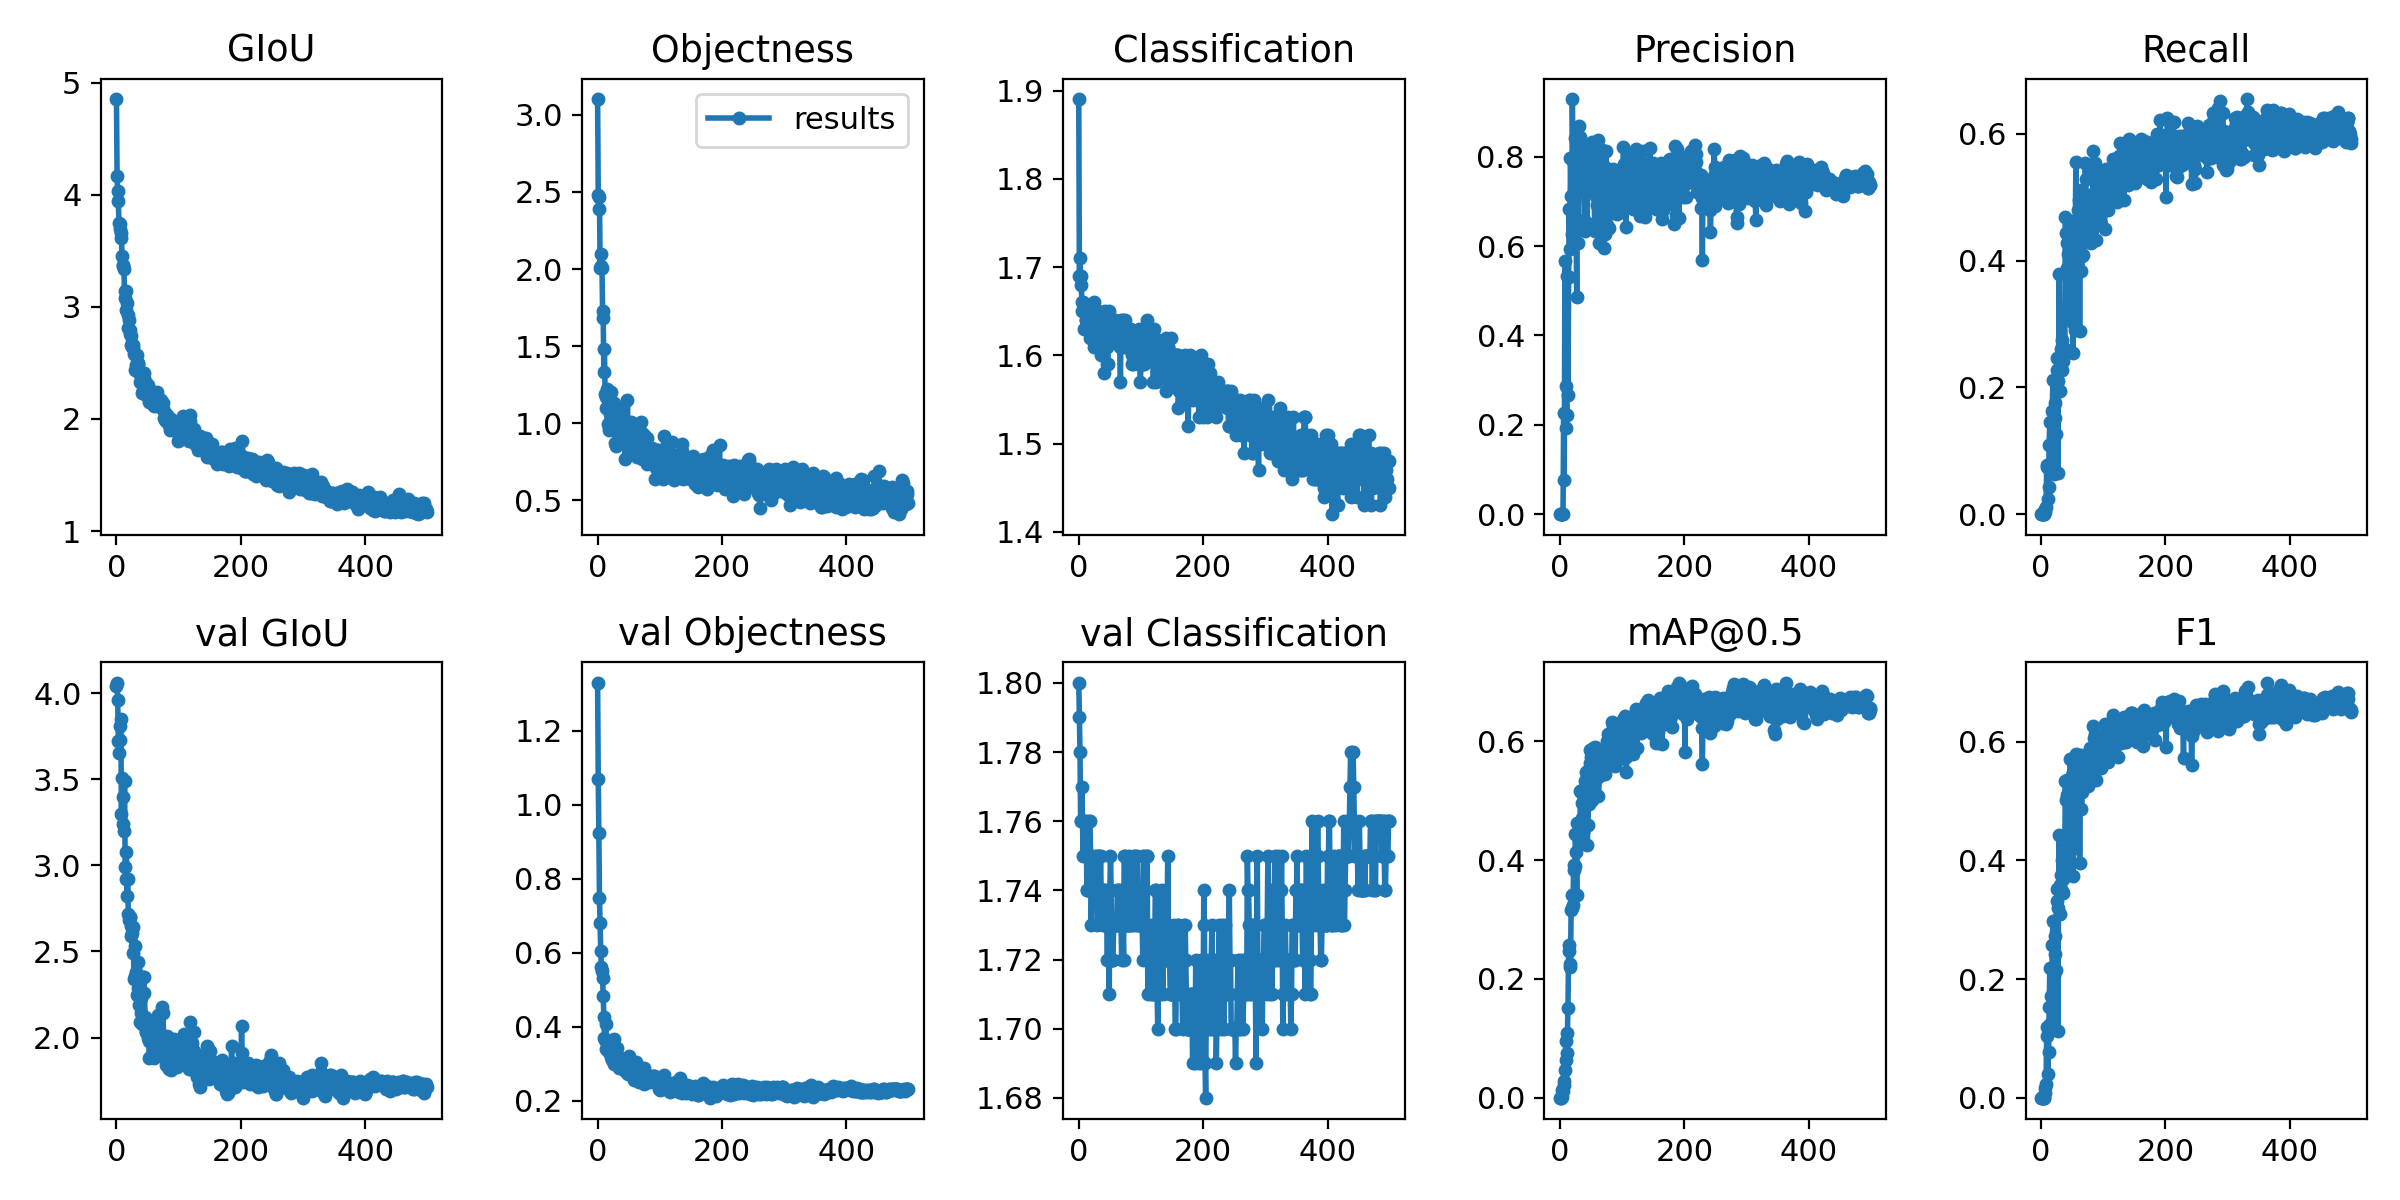

In [29]:
!python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [34]:
!python3 test.py --data data/objects.data --cfg ./cfg/yolov3-tiny-3cls.cfg --weights weights/last.pt --iou-thres 0.7 --augment 

Namespace(augment=True, batch_size=16, cfg='././cfg/yolov3-tiny-3cls.cfg', conf_thres=0.001, data='./data/objects.data', device='', img_size=512, iou_thres=0.7, save_json=False, single_cls=False, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 37 layers, 8.6745e+06 parameters, 8.6745e+06 gradients
Fusing layers...
Model Summary: 26 layers, 8.67131e+06 parameters, 8.67131e+06 gradients
Caching labels data/valid.txt (29 found, 0 missing, 1 empty, 0 duplicate, for 30 images): 100% 30/30 [00:00<00:00, 9120.70it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 2/2 [00:01<00:00,  1.72it/s]
                 all        30       160     0.561     0.619      0.59      0.58
                head        30        81     0.535     0.654     0.559     0.589
              helmet        30        44     0.468     0.659     0.602     0.547
                mask     

In [40]:
!python3 test.py --data data/objects.data --cfg ./cfg/yolov3-tiny-3cls.cfg --weights weights/last.pt --img-size 416

Namespace(augment=False, batch_size=16, cfg='././cfg/yolov3-tiny-3cls.cfg', conf_thres=0.001, data='./data/objects.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 37 layers, 8.6745e+06 parameters, 8.6745e+06 gradients
Fusing layers...
Model Summary: 26 layers, 8.67131e+06 parameters, 8.67131e+06 gradients
Caching labels data/valid.txt (29 found, 0 missing, 1 empty, 0 duplicate, for 30 images): 100% 30/30 [00:00<00:00, 6649.53it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 2/2 [00:00<00:00,  2.87it/s]
                 all        30       160     0.729     0.578     0.617     0.641
                head        30        81     0.817     0.605     0.612     0.695
              helmet        30        44     0.622     0.614     0.602     0.618
                mask    

Namespace(agnostic_nms=False, augment=False, cfg='././cfg/yolov3-tiny-3cls.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='./data/objects.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 37 layers, 8.6745e+06 parameters, 8.6745e+06 gradients
image 1/7 data/samples/img_1.jpg: 384x512 1 heads, Done. (0.003s)
image 2/7 data/samples/img_2.jpg: 512x512 Done. (0.003s)
image 3/7 data/samples/img_3.jpeg: 384x512 2 heads, 2 helmets, Done. (0.003s)
image 4/7 data/samples/img_4.jpeg: 320x512 1 heads, Done. (0.003s)
image 5/7 data/samples/img_5.jpeg: 512x384 Done. (0.003s)
image 6/7 data/samples/img_6.jpeg: 320x512 1 heads, 1 helmets, Done. (0.003s)
image 7/7 data/samples/img_7.jpg: 320x512 1 heads, Done. (0.003s)
Results saved to /content/yolov3/output
Done. (0.225s)


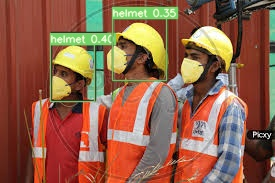

In [55]:
!python3 detect.py --names data/objects.names --cfg ./cfg/yolov3-tiny-3cls.cfg --weights weights/last.pt
Image(filename='output/img_3.jpeg', width=600)

In [62]:
!python3 train.py --data ./data/objects.data --cfg ./cfg/yolov3-spp-3cls.cfg --epochs 500

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='././cfg/yolov3-spp-3cls.cfg', data='./data/objects.data', device='', epochs=500, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-06-04 23:56:41.144766: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.25841e+07 parameters, 6.25841e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels data/train.txt (492 found, 0 missing, 69 empty, 0 duplicate, for 561 images): 100% 561/561 [00:00<00:00, 10523.28it/

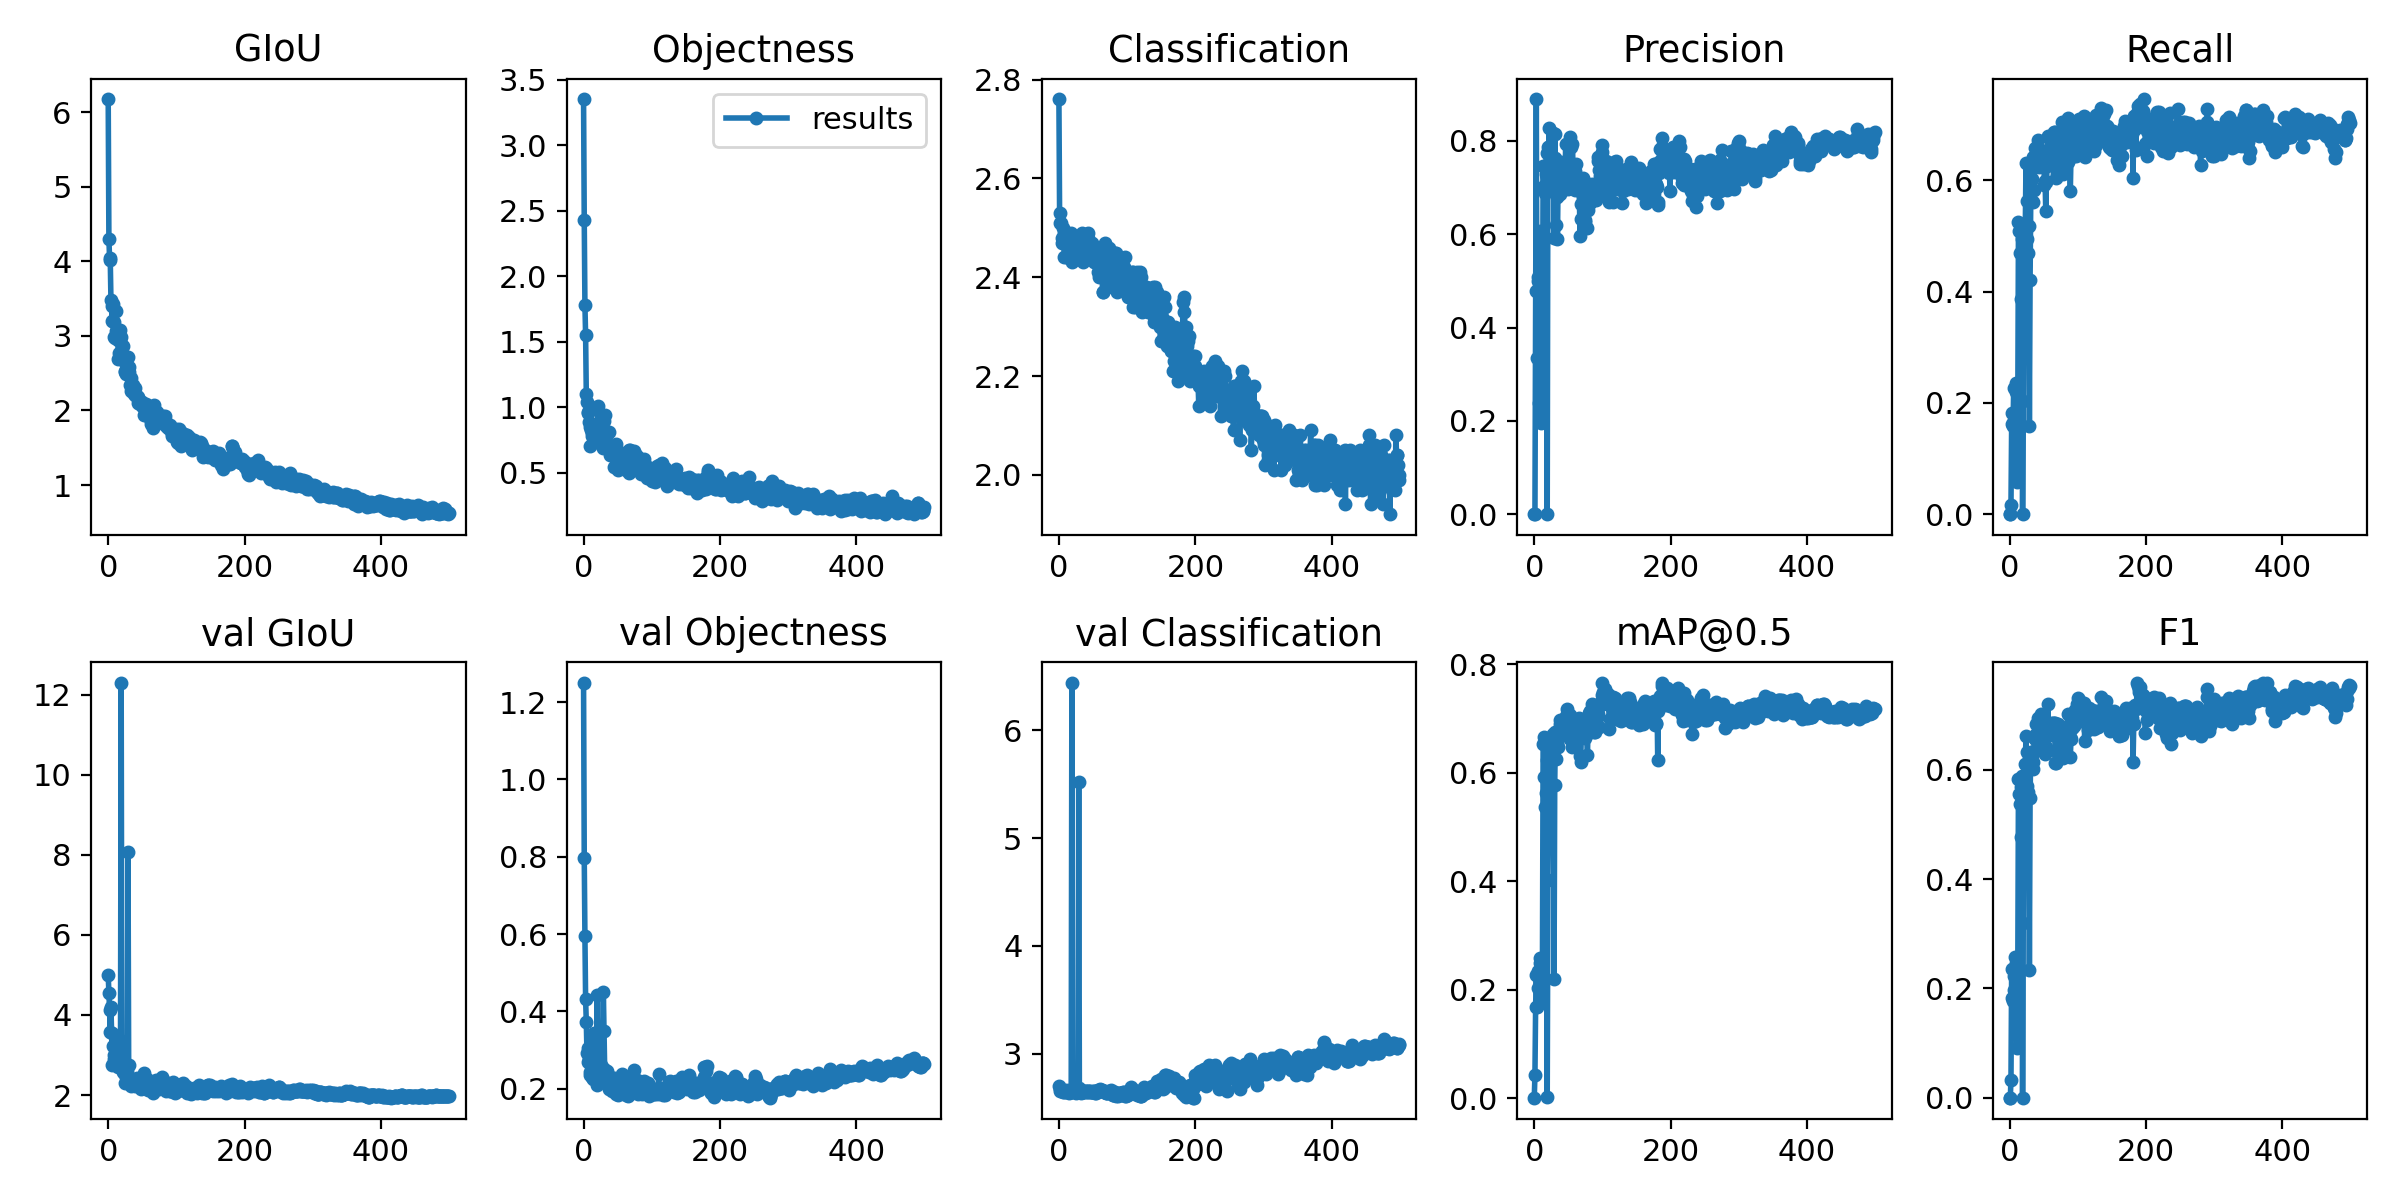

In [63]:
!python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [64]:
!python3 test.py --data data/objects.data --cfg ./cfg/yolov3-spp-3cls.cfg --weights weights/last.pt

Namespace(augment=False, batch_size=16, cfg='././cfg/yolov3-spp-3cls.cfg', conf_thres=0.001, data='./data/objects.data', device='', img_size=512, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25841e+07 parameters, 6.25841e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25573e+07 parameters, 6.25573e+07 gradients
Caching labels data/valid.txt (29 found, 0 missing, 1 empty, 0 duplicate, for 30 images): 100% 30/30 [00:00<00:00, 1108.84it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 2/2 [00:00<00:00,  2.02it/s]
                 all        30       160     0.812     0.679     0.712     0.735
                head        30        81     0.853     0.741     0.784     0.793
              helmet        30        44     0.711     0.705     0.684     0.708
                mask 

Namespace(agnostic_nms=False, augment=False, cfg='././cfg/yolov3-spp-3cls.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='./data/objects.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25841e+07 parameters, 6.25841e+07 gradients
image 1/4 data/samples/109.jpg: 384x512 1 heads, 2 helmets, 1 masks, Done. (0.017s)
image 2/4 data/samples/112.jpg: 448x512 1 heads, 1 helmets, Done. (0.019s)
image 3/4 data/samples/114.jpg: 384x512 2 heads, 4 helmets, 2 masks, Done. (0.017s)
image 4/4 data/samples/94.jpg: 384x512 2 heads, 1 helmets, Done. (0.017s)
Results saved to /content/yolov3/output
Done. (0.122s)


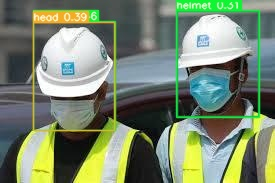

In [68]:
!python3 detect.py --names data/objects.names --cfg ./cfg/yolov3-spp-3cls.cfg --weights weights/last.pt
Image(filename='output/109.jpg', width=600)